In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from prettytable import PrettyTable

In [110]:
# sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC, NuSVC
from scipy.stats import mode
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
import lightgbm as lgb
from catboost import CatBoostClassifier

In [3]:
naive_sub= pd.read_csv('data/forest/naive_submission.csv')
df= pd.read_csv('data/forest/train.csv').drop('Unnamed: 0',axis=1)
test= pd.read_csv('data/forest/test.csv').drop('row_ID',axis=1)

# Dataset exploration

In [170]:
print("Nombre d'observations dans les données d'entraînement:",len(df))
print("Nombre d'observations dans les données test:",len(test))

Nombre d'observations dans les données d'entraînement: 100000
Nombre d'observations dans les données test: 481012


## Variables

In [5]:
# Toutes les variables du jeu de données
columns = list(df.columns)
columns

['Elevation',
 'Aspect',
 'Slope',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Horizontal_Distance_To_Roadways',
 'Hillshade_9am',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points',
 'Wilderness_Area1',
 'Wilderness_Area2',
 'Wilderness_Area3',
 'Wilderness_Area4',
 'Soil_Type1',
 'Soil_Type2',
 'Soil_Type3',
 'Soil_Type4',
 'Soil_Type5',
 'Soil_Type6',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type9',
 'Soil_Type10',
 'Soil_Type11',
 'Soil_Type12',
 'Soil_Type13',
 'Soil_Type14',
 'Soil_Type15',
 'Soil_Type16',
 'Soil_Type17',
 'Soil_Type18',
 'Soil_Type19',
 'Soil_Type20',
 'Soil_Type21',
 'Soil_Type22',
 'Soil_Type23',
 'Soil_Type24',
 'Soil_Type25',
 'Soil_Type26',
 'Soil_Type27',
 'Soil_Type28',
 'Soil_Type29',
 'Soil_Type30',
 'Soil_Type31',
 'Soil_Type32',
 'Soil_Type33',
 'Soil_Type34',
 'Soil_Type35',
 'Soil_Type36',
 'Soil_Type37',
 'Soil_Type38',
 'Soil_Type39',
 'Soil_Type40',
 'Cover_Type']

In [6]:
# Vérification de données manquantes
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [ ]:
# Résumé des variables
df_summary = df.describe(include='all').T
df_summary

,count,mean,std,min,25%,50%,75%,max
Elevation,100000.0,2959.21515,280.832825,1860.0,2809.0,2996.0,3163.00,3858.0
Aspect,100000.0,155.55126,111.759698,0.0,59.0,127.0,260.00,360.0
Slope,100000.0,14.12285,7.507368,0.0,9.0,13.0,18.00,62.0
Horizontal_Distance_To_Hydrology,100000.0,269.60563,212.770595,0.0,108.0,218.0,384.00,1383.0
Vertical_Distance_To_Hydrology,100000.0,46.82159,58.689319,-161.0,7.0,30.0,69.00,598.0
Horizontal_Distance_To_Roadways,100000.0,2350.36113,1560.499103,0.0,1103.0,1992.0,3331.25,7078.0
Hillshade_9am,100000.0,212.10380,26.841126,0.0,198.0,218.0,231.00,254.0
Hillshade_Noon,100000.0,223.34867,19.756411,42.0,213.0,226.0,237.00,254.0
Hillshade_3pm,100000.0,142.58566,38.459542,0.0,119.0,143.0,169.00,254.0
Horizontal_Distance_To_Fire_Points,100000.0,1976.43653,1324.925172,0.0,1020.0,1704.0,2549.00,7126.0


In [8]:
# Variable qualitative ou quantitative
# Toutes les variables sont quantitatives, à part Soil_Type et Wilderness_Area
quantitative_vars = columns[:10]
qual_vars = columns[10:]
qualitative_vars = [item.rsplit('_')[1] for item in qual_vars if item != 'Cover_Type']

In [9]:
df['Cover_Type'].value_counts()

Cover_Type
2    48676
1    36410
3     6273
7     3568
6     2967
5     1635
4      471
Name: count, dtype: int64

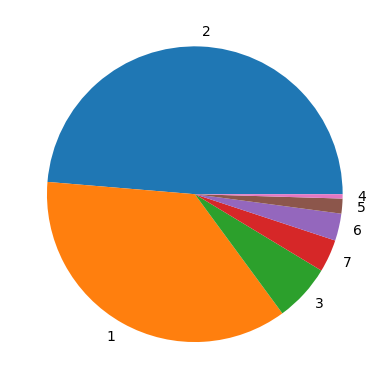

In [10]:
cover_counts = df['Cover_Type'].value_counts().reset_index()
plt.pie(cover_counts['count'], labels=cover_counts['Cover_Type'])
plt.show()

In [ ]:
#Dataframe avec toutes les valeurs du dataframe
df_long = pd.melt(df, var_name='Variables', value_name='Values')
df_long_rand = df_long[df_long['Variables'].isin(quantitative_vars)]

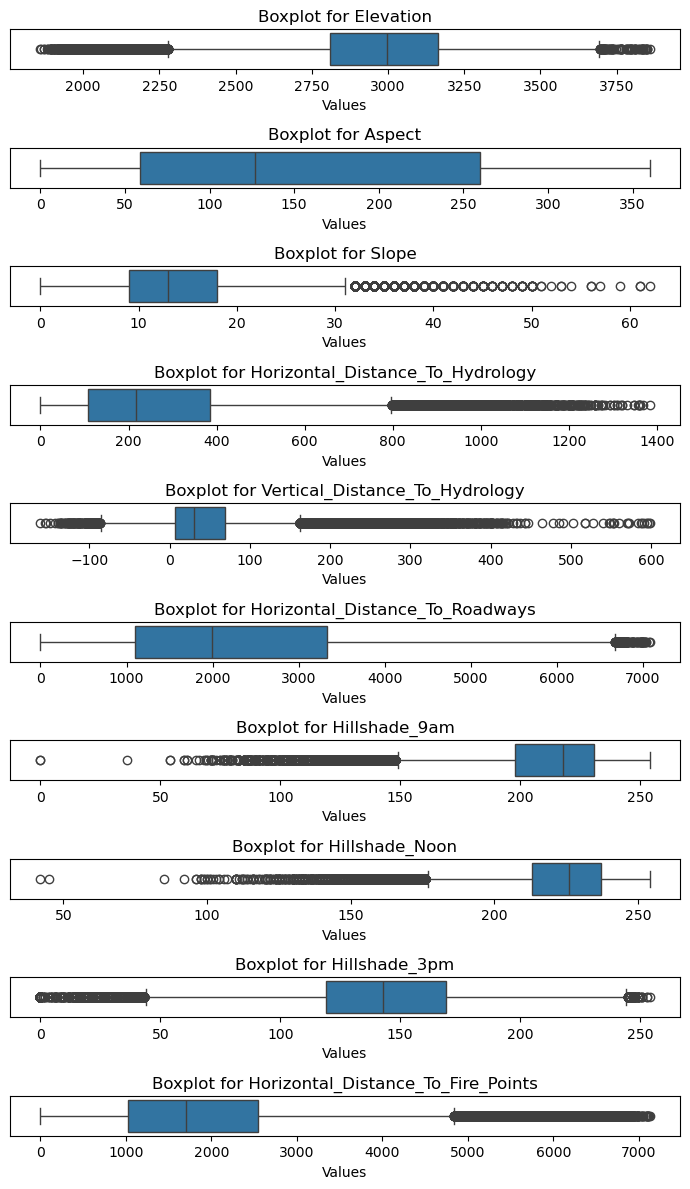

In [12]:
# Définir la taille de la figure pour s'adapter au nombre de sous-graphiques
fig, axes = plt.subplots(nrows=len(quantitative_vars), figsize=(7, len(quantitative_vars)*1.2))

# Tracer un boxplot par variable avec sa propre échelle
for i, var in enumerate(quantitative_vars):
    sns.boxplot(data=df_long_rand[df_long_rand['Variables'] == var],x="Values", y="Variables", ax=axes[i],dodge=False)
    axes[i].set_title(f"Boxplot for {var}")
    axes[i].set_ylabel('')
    axes[i].get_yaxis().set_visible(False)
    
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

In [167]:
# Filtre les données en fonction des quantiles pour chaque variable

df_filtered = df.copy()
for col in quantitative_vars:
    Q3 = df_filtered[col].quantile(0.85)
    Q1 = df_filtered[col].quantile(0.15)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
df_filtered_long = pd.melt(df_filtered, var_name='Variables', value_name='Values')

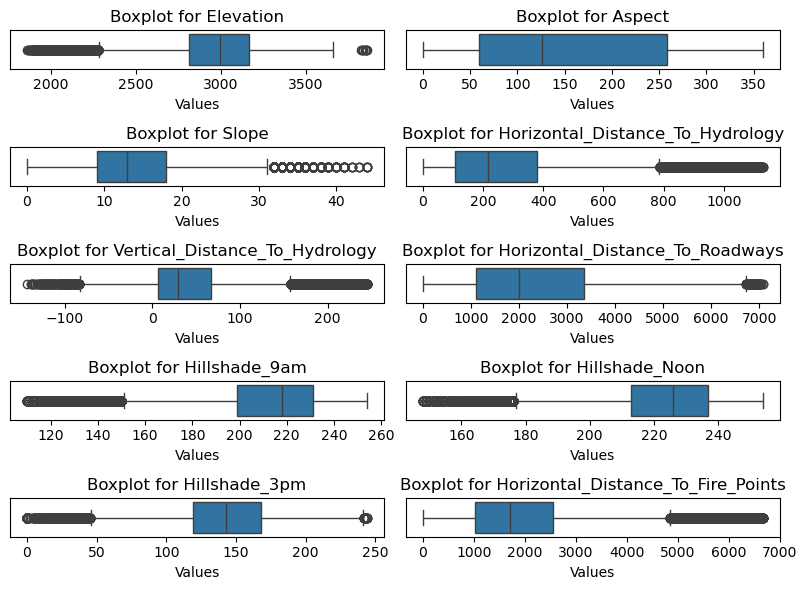

In [14]:
# Définir la taille de la figure pour s'adapter au nombre de sous-graphiques
fig, axes = plt.subplots(5,2, figsize=(8, 6))
axes = axes.flatten()
# Tracer un boxplot par variable avec sa propre échelle
for i, var in enumerate(quantitative_vars):
    sns.boxplot(data=df_filtered_long[df_filtered_long['Variables'] == var],x="Values", y="Variables", ax=axes[i],dodge=False)
    axes[i].set_title(f"Boxplot for {var}")
    axes[i].set_ylabel('')
    axes[i].get_yaxis().set_visible(False)
    
# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()

## *Corrélation*

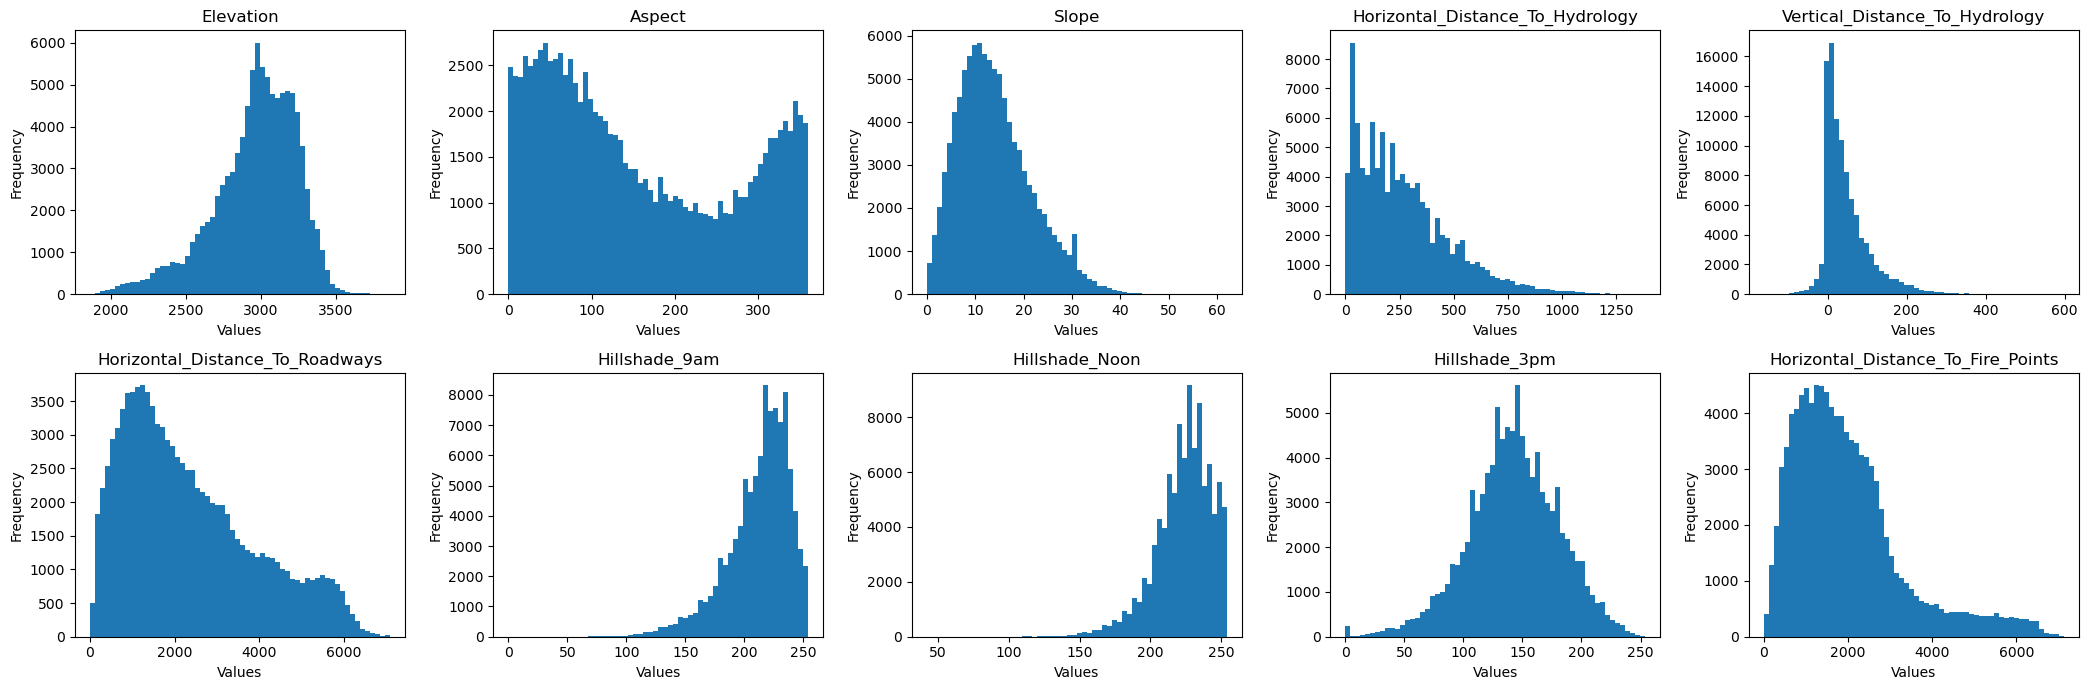

In [15]:
# Distribution des variables quantitatives
fig, axes = plt.subplots(2,5,figsize=(21,7))
axes = axes.flatten()
for i,col in enumerate(quantitative_vars):
  axes[i].hist(df[col],bins=60)
  axes[i].set_title(col)
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

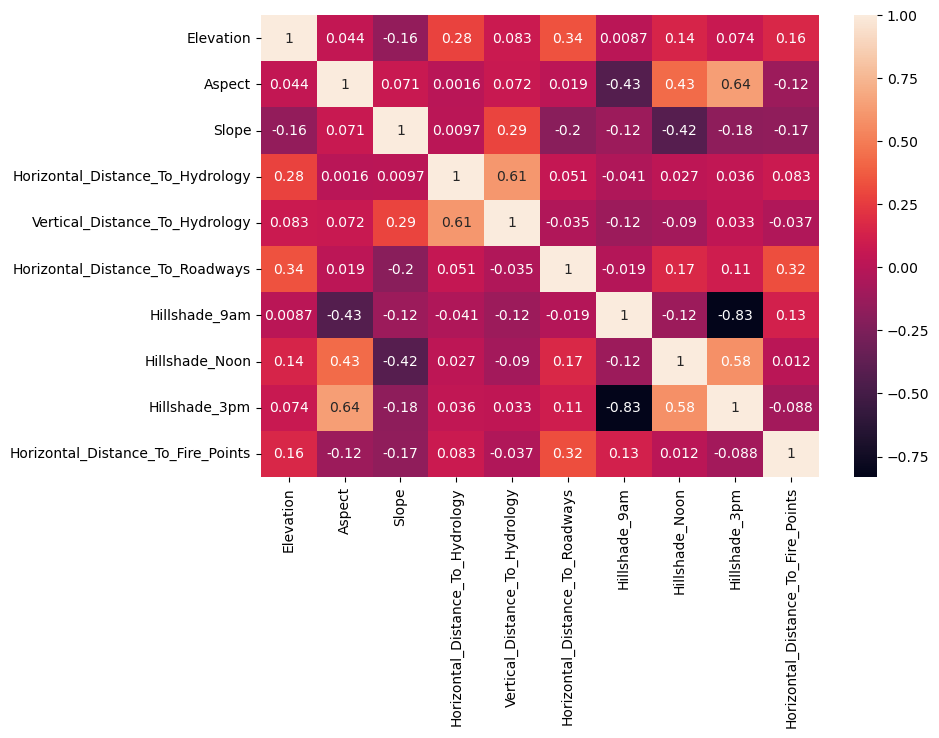

In [16]:
# Matrice des corrélationdes variables quantitatives
df_corr = df_filtered[quantitative_vars].corr(method='spearman')
plt.figure(figsize=(9,6))
sns.heatmap(df_corr,annot=True)
plt.show()

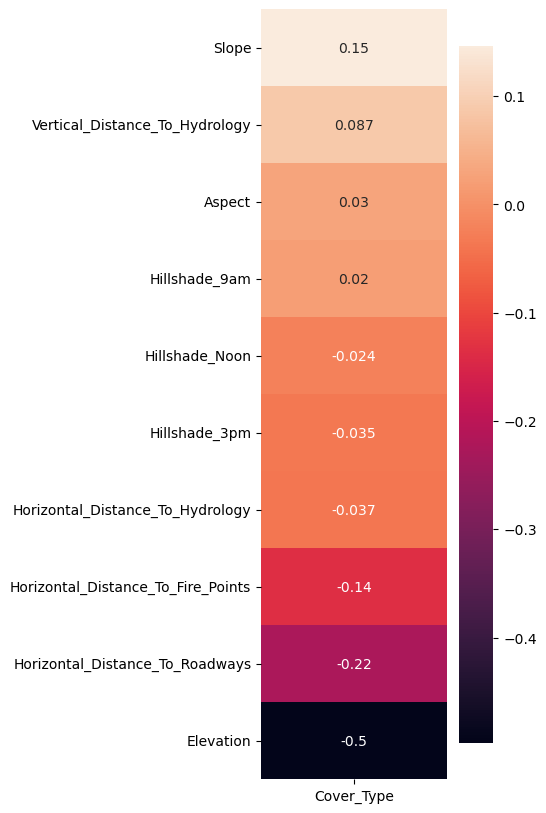

In [186]:
df_corr2 = df_filtered[quantitative_vars+['Cover_Type']].corr(method='spearman')
target_spearman_corr = df_corr2[['Cover_Type']].drop('Cover_Type').sort_values(by='Cover_Type', ascending=False)
plt.figure(figsize=(3,10))
sns.heatmap(target_spearman_corr,annot=True)
plt.show()

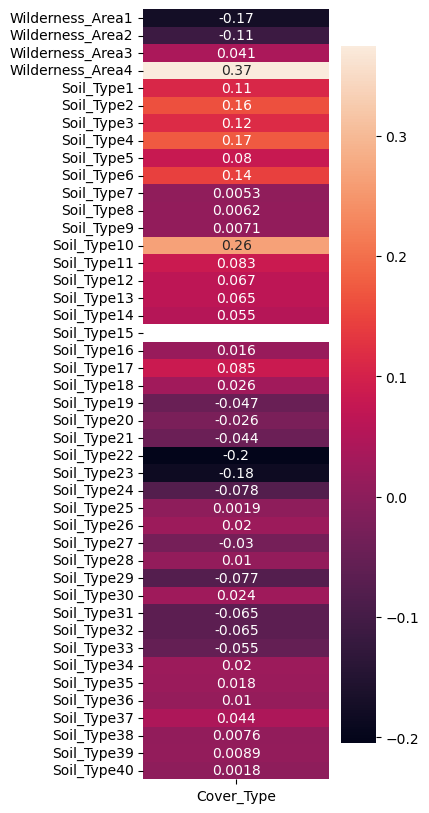

In [18]:
df_corr2 = df_filtered[qual_vars].corr(method='spearman')
target_spearman_corr = df_corr2[['Cover_Type']].drop('Cover_Type')
plt.figure(figsize=(3,10))
sns.heatmap(target_spearman_corr,annot=True)
plt.show()

Comparaison du taux de Soil_Type et Wilderness_Area entre les donnees entrainement et test.

In [19]:
nb_valeurs = np.zeros(len(qual_vars)-1)

for i, col in enumerate(qual_vars):
    if col != 'Cover_Type':
        nb_valeurs[i] = sum(df[col])

nb_valeurs2 = np.zeros(len(qual_vars)-1)

for i, col in enumerate(qual_vars):
    if col != 'Cover_Type':
        nb_valeurs2[i] = sum(test[col])

In [20]:
train_qual = pd.Series(nb_valeurs/df.shape[0], index=qualitative_vars, name="Test (%)")
test_qual = pd.Series(nb_valeurs2/test.shape[0], index=qualitative_vars, name="Test (%)")
comparaison_df = pd.concat([train_qual,test_qual], axis=1)

In [21]:
print(comparaison_df)

        Test (%)  Test (%)
Area1    0.44804  0.449037
Area2    0.05114  0.051496
Area3    0.43623  0.436041
Area4    0.06459  0.063427
Type1    0.00522  0.005216
Type2    0.01307  0.012927
Type3    0.00857  0.008245
Type4    0.02102  0.021401
Type5    0.00272  0.002755
Type6    0.01104  0.011374
Type7    0.00016  0.000185
Type8    0.00036  0.000297
Type9    0.00205  0.001958
Type10   0.05627  0.056146
Type11   0.02170  0.021288
Type12   0.05202  0.051494
Type13   0.03076  0.029843
Type14   0.00109  0.001019
Type15   0.00000  0.000006
Type16   0.00481  0.004915
Type17   0.00587  0.005894
Type18   0.00327  0.003268
Type19   0.00672  0.006962
Type20   0.01595  0.015933
Type21   0.00150  0.001430
Type22   0.05684  0.057564
Type23   0.09892  0.099499
Type24   0.03604  0.036743
Type25   0.00077  0.000825
Type26   0.00392  0.004567
Type27   0.00189  0.001865
Type28   0.00133  0.001690
Type29   0.19662  0.198716
Type30   0.05215  0.051880
Type31   0.04385  0.044242
Type32   0.09025  0.090422
T

## Importance des variables

In [24]:
# Exemple de colonnes one-hot encodées pour 'Soil_Type'
# Creation du dataframe decoded (varaibles qualitatives ne sont plus one hot encoded)
df_filtered2 = df_filtered.copy()
df_filtered2.columns
soil_columns = [col for col in df_filtered2.columns if col.startswith('Soil_Type')]
area_columns = [col for col in df_filtered2.columns if col.startswith('Wilderness_Area')]

df_filtered2['Soil_Type'] = np.argmax(df_filtered2[soil_columns].values, axis=1)
df_filtered2['Wilderness_Area'] = np.argmax(df_filtered2[area_columns].values, axis=1)

# Type catégorie pour pas confondre avec des entiers
df_filtered2['Soil_Type'] = df_filtered2['Soil_Type'].astype('category')
df_filtered2['Wilderness_Area'] = df_filtered2['Wilderness_Area'].astype('category')

# Supprimer les anciennes colonnes one-hot encodées
df_filtered2 = df_filtered2.drop(columns=soil_columns+area_columns)

Text(0.5, 0, 'Importance')

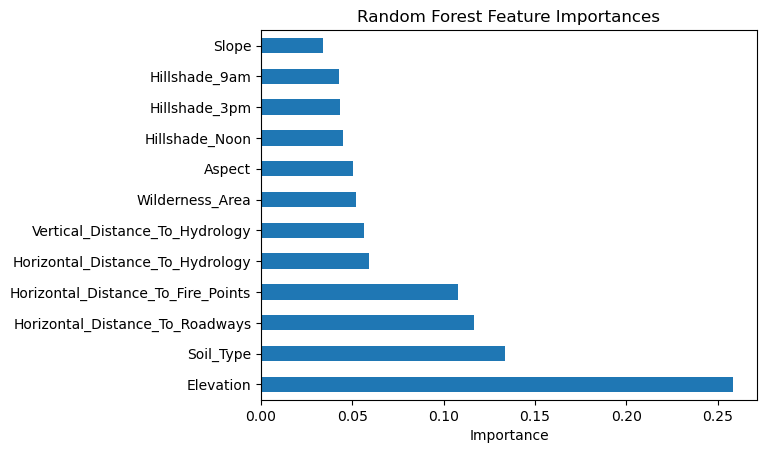

In [25]:
# Via randomForest
X = df_filtered2.drop('Cover_Type',axis=1)
y = df_filtered2['Cover_Type']

# Entrainer un modele de Random Forest
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
imp = rfc_model.feature_importances_
forest_imp = pd.Series(imp, index = X.columns)
forest_imp = forest_imp.sort_values(ascending=False)

# Plot les importances
fig = plt.figure()

forest_imp.plot.barh()
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')

# ***Classification***

## Données entraînement et test

In [26]:
df_filtered = df_filtered.reset_index(drop=True)

In [27]:
### Données one hot encoded ###
X = df_filtered.drop('Cover_Type',axis=1)
y = df_filtered['Cover_Type']

In [28]:
# Partionnement test-train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

features = X_train.columns

## Feature scaling

In [166]:
# Normalise les données
ct_s = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(), quantitative_vars)
    ],
    remainder='passthrough'
)

# Transformé les données
X_train_ss = ct_s.fit_transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=features)

X_test_ss = ct_s.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=features)

# Standardise avec méthode Min-Max
ct_m = ColumnTransformer(
    transformers=[
        ('standardize', MinMaxScaler(), quantitative_vars)
    ],
    remainder='passthrough'
)

# Transformé les données
X_train_mm = ct_m.fit_transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=features)

X_test_mm = ct_m.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=features)

## Entraînement modèles sans configuration

### Données de base

In [ ]:
# Sur données originales

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=300),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "XGBoost": XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=0),
    "CatBoost": CatBoostClassifier(random_seed=42, verbose=0),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=42)
}

accuracy_scores_default = {}
precision_scores_default = {}
recall_scores_default = {}
f1_scores_default = {}

for method, model in models.items():
    print(method)
    if method == 'SVC':
        index = np.random.randint(0, len(X_train), 5000)
        X_train_subset = X_train.iloc[index]
        y_train_subset = y_train.iloc[index]
        base_model = model.fit(X_train_subset, y_train_subset)
    elif method in ['XGBoost','XGBoostRF']:
        # XGBoost demande à ce que les labels commencent à 0
        base_model = model.fit(X_train, y_train-1)
    else:
        base_model = model.fit(X_train, y_train)

    if method in ['XGBoost', 'XGBoostRF']:
        y_pred = base_model.predict(X_test) + 1
    else:
        y_pred = base_model.predict(X_test)
    
    # Calculate metrics correctly with y_test first
    accuracy_scores_default[method] = accuracy_score(y_test, y_pred)
    precision_scores_default[method] = precision_score(y_test, y_pred, average='weighted')
    recall_scores_default[method] = recall_score(y_test, y_pred, average='weighted')
    f1_scores_default[method] = f1_score(y_test, y_pred, average='weighted')

Logistic Regression


c:\Users\Vincent\anaconda3\envs\m2\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Vincent\anaconda3\envs\m2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classifier
SVC


c:\Users\Vincent\anaconda3\envs\m2\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost
LightGBM
CatBoost
Extra Trees Classifier


### Données standardisées

In [ ]:
# Sur données Standardisées

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=300),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "XGBoost": XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=0),
    "CatBoost": CatBoostClassifier(random_seed=42, verbose=0),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=42)
}

accuracy_scores_default_ss = {}
precision_scores_default_ss = {}
recall_scores_default_ss = {}
f1_scores_default_ss = {}

for method, model in models.items():
    print(method)
    if method == 'SVC':
        index = np.random.randint(0, len(X_train_ss), 5000)
        X_train_subset = X_train_ss.iloc[index]
        y_train_subset = y_train.iloc[index]
        base_model = model.fit(X_train_subset, y_train_subset)
    elif method in ['XGBoost','XGBoostRF']:
        # XGBoost demande à ce que les labels commencent à 0
        base_model = model.fit(X_train_ss, y_train-1)
    else:
        base_model = model.fit(X_train_ss, y_train)

    if method in ['XGBoost', 'XGBoostRF']:
        y_pred = base_model.predict(X_test_ss) + 1
    else:
        y_pred = base_model.predict(X_test_ss)
    
    # Calculate metrics correctly with y_test first
    accuracy_scores_default_ss[method] = accuracy_score(y_test, y_pred)
    precision_scores_default_ss[method] = precision_score(y_test, y_pred, average='weighted')
    recall_scores_default_ss[method] = recall_score(y_test, y_pred, average='weighted')
    f1_scores_default_ss[method] = f1_score(y_test, y_pred, average='weighted')

Logistic Regression
Random Forest Classifier
SVC
XGBoost
LightGBM
CatBoost
Extra Trees Classifier


### Données Min-Max

In [ ]:
# Sur données Min-Max

models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=300),
    "Random Forest Classifier": RandomForestClassifier(random_state=42),
    "SVC": SVC(random_state=42),
    "XGBoost": XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier(random_state=42, verbose=0),
    "CatBoost": CatBoostClassifier(random_seed=42, verbose=0),
    "Extra Trees Classifier": ExtraTreesClassifier(random_state=42)
}

accuracy_scores_default_mm = {}
precision_scores_default_mm = {}
recall_scores_default_mm = {}
f1_scores_default_mm = {}

for method, model in models.items():
    print(method)
    if method == 'SVC':
        index = np.random.randint(0, len(X_train_mm), 5000)
        X_train_subset = X_train_mm.iloc[index]
        y_train_subset = y_train.iloc[index]
        base_model = model.fit(X_train_subset, y_train_subset)
    elif method in ['XGBoost','XGBoostRF']:
        # XGBoost demande à ce que les labels commencent à 0
        base_model = model.fit(X_train_mm, y_train-1)
    else:
        base_model = model.fit(X_train_mm, y_train)

    if method in ['XGBoost', 'XGBoostRF']:
        y_pred = base_model.predict(X_test_mm) + 1
    else:
        y_pred = base_model.predict(X_test_mm)
    
    # Calculate metrics correctly with y_test first
    accuracy_scores_default_mm[method] = accuracy_score(y_test, y_pred)
    precision_scores_default_mm[method] = precision_score(y_test, y_pred, average='weighted')
    recall_scores_default_mm[method] = recall_score(y_test, y_pred, average='weighted')
    f1_scores_default_mm[method] = f1_score(y_test, y_pred, average='weighted')

Logistic Regression
Random Forest Classifier
SVC
XGBoost
LightGBM
CatBoost
Extra Trees Classifier


### Performances et comparaisons

In [33]:
# Toutes les métriques
table = PrettyTable()

table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']

for model in accuracy_scores_default.keys():
    table.add_row([model, accuracy_scores_default.get(model, '-'), precision_scores_default.get(model, '-'), recall_scores_default.get(model, '-'), f1_scores_default.get(model, '-')])

# Print the table
print(table)

table = PrettyTable()

table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']

for model in accuracy_scores_default_ss.keys():
    table.add_row([model, accuracy_scores_default_ss.get(model, '-'), precision_scores_default_ss.get(model, '-'), recall_scores_default_ss.get(model, '-'), f1_scores_default_ss.get(model, '-')])

# Print the table
print(table)

table = PrettyTable()

table.field_names = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']

for model in accuracy_scores_default_mm.keys():
    table.add_row([model, accuracy_scores_default_mm.get(model, '-'), precision_scores_default_mm.get(model, '-'), recall_scores_default_mm.get(model, '-'), f1_scores_default_mm.get(model, '-')])

# Print the table
print(table)

+--------------------------+--------------------+--------------------+--------------------+--------------------+
|          Model           |      Accuracy      |     Precision      |       Recall       |         F1         |
+--------------------------+--------------------+--------------------+--------------------+--------------------+
|   Logistic Regression    | 0.6545411236260932 | 0.6086747607336331 | 0.6545411236260932 | 0.6261066991230017 |
| Random Forest Classifier | 0.8952257801068499 | 0.8955029909288205 | 0.8952257801068499 | 0.8937593877229937 |
|           SVC            | 0.698642256780209  | 0.6723518246372016 | 0.698642256780209  | 0.6701179574542827 |
|         XGBoost          | 0.8579984346820022 | 0.8577930320272416 | 0.8579984346820022 | 0.8567357943841082 |
|         LightGBM         | 0.8499676727804811 | 0.8498345433809557 | 0.8499676727804811 | 0.8490002856606078 |
|         CatBoost         | 0.8604484976350086 | 0.8601471258548066 | 0.8604484976350086 | 0.85

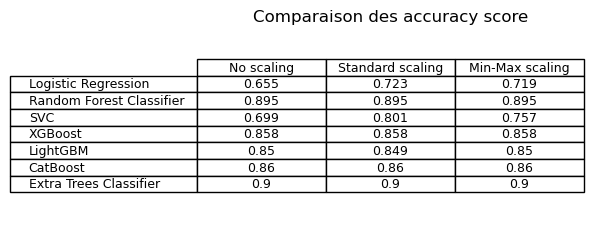

In [34]:
# Comparaison du accuracy score
accuracy_scores_default_all = [accuracy_scores_default.values(), accuracy_scores_default_ss.values(), accuracy_scores_default_mm.values()]
accuracy_scores_default_all = np.array([np.round(list(i),3) for i in accuracy_scores_default_all]).T

# Plot
fig, ax = plt.subplots(figsize=(5, 2.5)) 
ax.axis('off')

the_table = ax.table(cellText=accuracy_scores_default_all, colLabels=['No scaling', 'Standard scaling', 'Min-Max scaling'], rowLabels=list(models.keys()), loc='center',cellLoc='center')
plt.title('Comparaison des accuracy score')

plt.show()

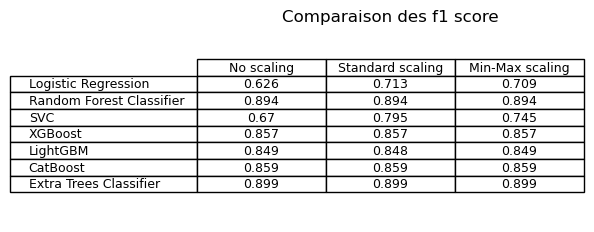

In [35]:
# Comparaison du f1 score
f1_scores_default_all = [f1_scores_default.values(), f1_scores_default_ss.values(), f1_scores_default_mm.values()]
f1_scores_default_all = np.array([np.round(list(i),3) for i in f1_scores_default_all]).T

# Plot
fig, ax = plt.subplots(figsize=(5, 2.5))
ax.axis('off')

the_table = ax.table(cellText=f1_scores_default_all, colLabels=['No scaling', 'Standard scaling', 'Min-Max scaling'], rowLabels=list(models.keys()), loc='center',cellLoc='center')
plt.title('Comparaison des f1 score')

plt.show()

## Feature engineering

In [36]:
df_fe = pd.DataFrame()

### Création de nouvelles variables

Nouvelles variables quantitatives

In [38]:
# Distance to hydrology
df_fe['Distance_To_Hydrology'] = np.sqrt(df_filtered['Horizontal_Distance_To_Hydrology']**2 + df_filtered['Vertical_Distance_To_Hydrology']**2)
df_fe['Distance_To_Hydrology'] = df_fe['Distance_To_Hydrology'].astype(float)

In [39]:
# Elevation to Aspect
df_fe['Elevation_Aspect'] = df_filtered['Elevation']*np.sin(np.radians(df_filtered['Aspect']))
df_fe['Elevation_Aspect'] = df_fe['Elevation_Aspect'].astype(float)

Nouvelles variables qualitatives

In [41]:
# Entrainement d'un modèle basé sur Soil Type et Wilderness Area
# Encode `Soil_Type` et `Wilderness_Area` comme des catégories
soil_columns = [col for col in df_filtered.columns if col.startswith('Soil_Type')]
area_columns = [col for col in df_filtered.columns if col.startswith('Wilderness_Area')]
X_sw = df_filtered[soil_columns+area_columns]
y_sw = df_filtered['Cover_Type']

model_sw = RandomForestClassifier(random_state=42)
model_sw.fit(X_sw, y_sw)

df_fe['Soil_Wilderness_Predict'] = model_sw.predict(X_sw)
df_fe['Soil_Wilderness_Predict'] = df_fe['Soil_Wilderness_Predict'].astype(str)
df_fe['Soil_Wilderness_Predict'] = df_fe['Soil_Wilderness_Predict'].astype('category')

### Concatenation et normalisation des données 

In [43]:
ct_s2 = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(), ['Distance_To_Hydrology', 'Elevation_Aspect'])
    ],
    remainder='passthrough'
)

df_fe_ss = ct_s2.fit_transform(df_fe)
df_fe_ss = pd.DataFrame(df_fe_ss, columns=df_fe.columns)

# Convertir en numérique les colonnes qui devraient l'être
cols_to_numeric = ['Distance_To_Hydrology', 'Elevation_Aspect']
for col in cols_to_numeric:
    df_fe_ss[col] = pd.to_numeric(df_fe_ss[col], errors='coerce')

# Convertir les autres colonnes en type "category" pour les colonnes catégorielles
cols_to_category = ['Soil_Wilderness_Predict']
for col in cols_to_category:
    df_fe_ss[col] = df_fe_ss[col].astype('category')

ct_s = ColumnTransformer(
    transformers=[
        ('standardize', StandardScaler(), quantitative_vars)
    ],
    remainder='passthrough'
)

# Transformé les données
df_filtered_ss = ct_s.fit_transform(df_filtered)
df_filtered_ss = pd.DataFrame(df_filtered_ss, columns=df_filtered.columns)

df_filtered_ss = df_filtered_ss.join(df_fe_ss)

### Feature importance

In [259]:
# Creation du dataframe decoded (varaibles qualitatives ne sont plus one hot encoded)
df_fe2 = df_filtered_ss.copy()
df_fe2.columns
soil_columns = [col for col in df_fe2.columns if col.startswith('Soil_Type')]
area_columns = [col for col in df_fe2.columns if col.startswith('Wilderness_Area')]

df_fe2['Soil_Type'] = np.argmax(df_fe2[soil_columns].values, axis=1)
df_fe2['Wilderness_Area'] = np.argmax(df_fe2[area_columns].values, axis=1)

# Type catégorie pour pas confondre avec des entiers
df_fe2['Soil_Type'] = df_fe2['Soil_Type'].astype('category')
df_fe2['Wilderness_Area'] = df_fe2['Wilderness_Area'].astype('category')

# Supprimer les anciennes colonnes one-hot encodées
df_fe2 = df_fe2.drop(columns=soil_columns+area_columns)

Text(0.5, 0, 'Importance')

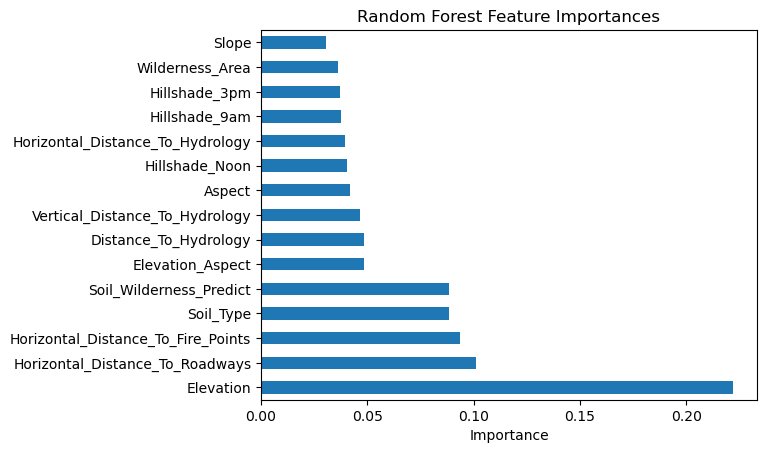

In [260]:
# Entrainer un modele de Random Forest
X_fe = df_fe2.drop('Cover_Type',axis=1)
y_fe = df_fe2['Cover_Type']

rfc_model = RandomForestClassifier()
rfc_model.fit(X_fe, y_fe)
imp = rfc_model.feature_importances_
forest_imp = pd.Series(imp, index = X_fe.columns)
forest_imp = forest_imp.sort_values(ascending=False)

# Plot les importances
fig = plt.figure()

forest_imp.plot.barh()
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')

Fonction qui applique toutes les transformations sur un dataset de même format que les données d'entraînement

In [44]:
# Fonction qui ajoute toutes les nouvelles variables
def dataframe_fe(df, model_sw, ct_s, ct_s2):
    # Input
    # model_sw : Modele pour predire Cover type a partir de Soil Type et Wilderness Area
    # ct_s : normalisation utilise sur donnees train
    # ct_s2 : normalisation utilise sur donnees train feature engineering

    # Output
    # df_filtered_ss: variables one hot encoded
    # df_filtered_ss: variable soil type n'est plus one hot encode

    df_fe = pd.DataFrame()
    df = df.drop('Soil_Type15', axis=1)
    
    # Distance to hydrology
    df_fe['Distance_To_Hydrology'] = np.sqrt(df['Horizontal_Distance_To_Hydrology']**2 + df['Vertical_Distance_To_Hydrology']**2)
    df_fe['Distance_To_Hydrology'] = df_fe['Distance_To_Hydrology'].astype(float)

    # Elevation to Aspect
    df_fe['Elevation_Aspect'] = df['Elevation']*np.sin(np.radians(df['Aspect']))
    df_fe['Elevation_Aspect'] = df_fe['Elevation_Aspect'].astype(float)

    # Entrainement d'un modèle basé sur Soil Type et Wilderness Area
    # Encode `Soil_Type` et `Wilderness_Area` comme des catégories
    soil_columns = [col for col in df.columns if col.startswith('Soil_Type')]
    area_columns = [col for col in df.columns if col.startswith('Wilderness_Area')]
    X_sw = df[soil_columns+area_columns]

    df_fe['Soil_Wilderness_Predict'] = model_sw.predict(X_sw)
    df_fe['Soil_Wilderness_Predict'] = df_fe['Soil_Wilderness_Predict'].astype(str)
    df_fe['Soil_Wilderness_Predict'] = df_fe['Soil_Wilderness_Predict'].astype('category')

    # Normalisation
    df_fe_ss = ct_s2.fit_transform(df_fe)
    df_fe_ss = pd.DataFrame(df_fe_ss, columns=df_fe.columns)

    # Convertir en numérique les colonnes qui devraient l'être
    cols_to_numeric = ['Distance_To_Hydrology', 'Elevation_Aspect']
    for col in cols_to_numeric:
        df_fe_ss[col] = pd.to_numeric(df_fe_ss[col], errors='coerce')

    # Convertir les autres colonnes en type "category" pour les colonnes catégorielles
    cols_to_category = ['Soil_Wilderness_Predict']
    for col in cols_to_category:
        df_fe_ss[col] = df_fe_ss[col].astype('category')

    # Transformé les données
    df_filtered_ss = ct_s.fit_transform(df)
    df_filtered_ss = pd.DataFrame(df_filtered_ss, columns=df.columns)
    df_filtered_ss = df_filtered_ss.join(df_fe_ss)

    ### Données pour laquelle la variable Soil_Type est décodée ###
    df_filtered_ss2 = df_filtered_ss.copy()

    soil_columns = [col for col in df_filtered_ss2.columns if col.startswith('Soil_Type')]

    df_filtered_ss2['Soil_Type'] = np.argmax(df_filtered_ss2[soil_columns].values, axis=1)

    # Type catégorie pour pas confondre avec des entiers
    df_filtered_ss2['Soil_Type'] = df_filtered_ss2['Soil_Type'].astype('category')

    # Supprimer les anciennes colonnes one-hot encodées
    df_filtered_ss2 = df_filtered_ss2.drop(columns=soil_columns)

    return df_filtered_ss, df_filtered_ss2

# Optimisation des hyperparametres par Validation Croisee

In [174]:
# Different models

# Return the model with the best performance in cross-validation after grid search (hyperparameters that achieve best cv score)
def tune_hyperparameters(model, method, param_grid, X_train, y_train, cv_folds, scoring):
    stratified_cv = StratifiedKFold(n_splits=cv_folds, shuffle=True)
    gs_model = RandomizedSearchCV(model, param_grid, cv=stratified_cv, scoring=scoring, n_jobs=-1, verbose=1)

    if method == 'XGBoost':        
        gs_model.fit(X_train, y_train-1)
    else:
        gs_model.fit(X_train, y_train)
    return gs_model.best_estimator_, gs_model.best_params_

models = {
    "Random Forest Classifier": RandomForestClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(enable_categorical=True),
    "LightGBM": lgb.LGBMClassifier(is_unbalance=True),
    "Extra Trees Classifier": ExtraTreesClassifier(class_weight='balanced')
}

hyperparameter_grids = {
    "Random Forest Classifier": {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True]
    },

    "XGBoost": {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 6, 10, 15],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.5, 1, 5],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 0.1, 0]
    },

    "LightGBM": {
        'n_estimators': [100, 300, 500],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [-1, 5, 10, 20],
        'min_child_samples': [5, 10, 20, 50],
        'min_split_gain': [0, 0.1, 0.5, 1],
        'num_leaves': [20, 31, 50, 100],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'reg_alpha': [0, 0.1, 1],
        'reg_lambda': [1, 0.1, 0]
    },

    "Extra Trees Classifier": {
        'n_estimators': [100, 300, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None],
        'bootstrap': [True]               
    }
}

"Decoder" la variable Soil_Type en une colonne catégorielle

In [153]:
# Les donnees
X = df_filtered_ss.drop('Cover_Type',axis=1)
y = df_filtered_ss['Cover_Type']

### Données pour laquelle la variable Soil_Type est décodée ###
df_filtered3 = df_filtered_ss.copy()

soil_columns = [col for col in df_filtered3.columns if col.startswith('Soil_Type')]

df_filtered3['Soil_Type'] = np.argmax(df_filtered3[soil_columns].values, axis=1)

# Type catégorie pour pas confondre avec des entiers
df_filtered3['Soil_Type'] = df_filtered3['Soil_Type'].astype('category')

# Supprimer les anciennes colonnes one-hot encodées
df_filtered3 = df_filtered3.drop(columns=soil_columns)

# df_filtered3 = df_filtered.copy()
X2 = df_filtered3.drop('Cover_Type',axis=1)
y2 = df_filtered3['Cover_Type']

Entraînement

In [ ]:
cv_folds = 5

tuned_models = {}
best_params = {}

for method,model in models.items():
    print(method)
    tuned_model, params = tune_hyperparameters(model, method, hyperparameter_grids[method], X2, y2, cv_folds, scoring='accuracy')
    tuned_models[method] = tuned_model
    best_params[method] = params

Random Forest Classifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBoost
Fitting 5 folds for each of 10 candidates, totalling 50 fits
LightGBM
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [158]:
tuned_models

{'Random Forest Classifier': RandomForestClassifier(class_weight='balanced', max_features=None,
                        min_samples_split=10),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.6, device=None, early_stopping_rounds=None,
               enable_categorical=True, eval_metric=None, feature_types=None,
               gamma=0, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=10, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=300, n_jobs=None,
               num_parallel_tree=None, objective='multi:softprob', ...),
 'LightGBM': LGBMClassifier(colsample_bytree=0.8, is_unbalance=True, max_dep

## Prediction d'ensemble par vote majoritaire

In [178]:
def majority_vote_ensemble(data, models):
    # test_set : soil type one hot encode

    # Predictions
    predictions = []
    for method in models:
        print(method)
        if method == 'XGBoost':
            pred = models[method].predict(data) + 1
            predictions.append(list(pred))
        else: 
            pred = models[method].predict(data)
            pred = list(map(int, pred))   
            predictions.append(pred)
    predictions = np.array(predictions).T  # Transpose so that rows are instances
    # Calculer le vote majoritaire pour chaque observation
    majority_vote_predictions, _ = mode(predictions, axis=1)
    
    return majority_vote_predictions.ravel()

In [160]:
X_test_true, X_test_true2 = dataframe_fe(test, model_sw, ct_s, ct_s2)

In [ ]:
predictions = majority_vote_ensemble(X_test_true2, tuned_models)

Random Forest Classifier
XGBoost
LightGBM
Extra Trees Classifier


Sauvegarder les résultats

In [162]:
results = pd.DataFrame()
# results['Unnamed: 0'] = np.arange(len(test))
results['row_ID'] = np.arange(len(test))
results['Cover_Type'] = predictions
results
results.to_csv('results_forest.csv', index=False)

### Performance sur les données d'entrainement

In [184]:
predictions_train = majority_vote_ensemble(X2, tuned_models)
print('Accuracy score:', accuracy_score(y2, predictions_train))
print('F1 score:', f1_score(y2, predictions_train,average='weighted'))

Random Forest Classifier
XGBoost
LightGBM
Extra Trees Classifier
Accuracy score: 0.9962431728855087
F1 score: 0.9962448511836497


# Optimisation pour des meilleurs scores dans le leaderboard

Fine tuning sur le f1 score

In [175]:
cv_folds = 5

tuned_models_f1 = {}
best_params_f1 = {}

for method,model in models.items():
    print(method)
    tuned_model, params = tune_hyperparameters(model, method, hyperparameter_grids[method], X2, y2, cv_folds, scoring='f1_weighted')
    tuned_models_f1[method] = tuned_model
    best_params_f1[method] = params

Random Forest Classifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBoost
Fitting 5 folds for each of 10 candidates, totalling 50 fits
LightGBM
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [179]:
predictions_f1 = majority_vote_ensemble(X_test_true2, tuned_models_f1)

Random Forest Classifier
XGBoost
LightGBM
Extra Trees Classifier


In [185]:
results = pd.DataFrame()
# results['Unnamed: 0'] = np.arange(len(test))
results['row_ID'] = np.arange(len(test))
results['Cover_Type'] = predictions_f1
results
results.to_csv('results_forest2.csv', index=False)